In [64]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import logging
import locality.utils.logging_utils as logging_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format = logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout
)


In [66]:
from dsets.counterfact import CounterFactDataset

counterfact = CounterFactDataset(data_dir="../counterfact")

located_in_city = [d for d in counterfact if d['requested_rewrite']['relation_id'] == "P17"]
places_to_cities = [
    (d['requested_rewrite']['subject'], d['requested_rewrite']['target_true']["str"])
    for d in located_in_city
]
print(len(places_to_cities))
places_to_cities[:4]

Loaded dataset with 21919 elements
875


[('Autonomous University of Madrid', 'Spain'),
 ('Pochepsky District', 'Russia'),
 ('Kuala Langat', 'Malaysia'),
 ('Wanne-Eickel Central Station', 'Germany')]

In [67]:
import locality.utils.dataset_utils as dset_utils

dset_utils.get_demonstrations(
    subj_obj_mapping=places_to_cities,
    num_options=3,
    num_icl=1,
    variable_binding_template=" {} is visiting {}",
    query_template=" {} is in {}",
)

([' Michael is visiting Plougonven,  William is visiting National Library of Peru,  Nan is visiting Club Aurora. Nan is in Bolivia'],
 ['Bolivia'],
 ['Club Aurora'],
 ['Nan'],
 ['Club Aurora', 'Plougonven', 'National Library of Peru'],
 ['Michael', 'Nan', 'William'])

In [68]:
from locality.dataset import generate_synthetic_dataset

In [69]:
synth_dataset = generate_synthetic_dataset(
    relation_subj_obj_mapping=places_to_cities,
    variable_binding_template=" {} is visiting {}",
    query_template=" {} is in {}",
    num_options=3,
    num_icl=5,
    batch_size=32
)

In [70]:
sample = synth_dataset[30]

print(sample[0])
print(sample[1])

 Michael is visiting La Guajira Desert,  Jose is visiting archdiocese of Gatineau,  Amy is visiting Wismar. Jose is in Canada
 Katherine is visiting Mont Saint-Bruno,  Ernest is visiting Wallmerod,  Brandon is visiting FC Volochanin-Ratmir Vyshny Volochyok. Ernest is in Germany
 Ellen is visiting Umarex,  Janet is visiting Gavork-e Nalin Rural District,  Delores is visiting Issenheim. Janet is in Iran
 Hazel is visiting Entracque,  Julie is visiting Putyvl,  Russell is visiting Wanne-Eickel Central Station. Russell is in Germany
 Ollie is visiting Hohenlohe-Langenburg,  Otis is visiting Giurgiu County,  Gloria is visiting Vesuvius Observatory. Gloria is in Italy
 Louis is visiting Minamiakita District,  Cassandra is visiting Logatec,  Sandra is visiting Kungliga Svenska Segelsällskapet. Sandra is in
Sweden


In [71]:
synth_dataset.qa_samples[10].to_json()

'{"query": " Angela is visiting Note Printing Australia,  David is visiting Foundation for a Free Information Infrastructure,  Mildred is visiting Olten railway station. Mildred is in", "subject": "Olten railway station", "variable": "Mildred", "answer": "Switzerland"}'

In [72]:
synth_dataset.to_json()

'{"few_shot_examples": [" Michael is visiting La Guajira Desert,  Jose is visiting archdiocese of Gatineau,  Amy is visiting Wismar. Jose is in Canada", " Katherine is visiting Mont Saint-Bruno,  Ernest is visiting Wallmerod,  Brandon is visiting FC Volochanin-Ratmir Vyshny Volochyok. Ernest is in Germany", " Ellen is visiting Umarex,  Janet is visiting Gavork-e Nalin Rural District,  Delores is visiting Issenheim. Janet is in Iran", " Hazel is visiting Entracque,  Julie is visiting Putyvl,  Russell is visiting Wanne-Eickel Central Station. Russell is in Germany", " Ollie is visiting Hohenlohe-Langenburg,  Otis is visiting Giurgiu County,  Gloria is visiting Vesuvius Observatory. Gloria is in Italy"], "qa_samples": [{"query": " Bernice is visiting CD Eldense,  Loren is visiting Bastille,  Bryan is visiting Castleisland Desmonds GAA. Bryan is in", "subject": "Castleisland Desmonds GAA", "variable": "Bryan", "answer": "Ireland"}, {"query": " Melba is visiting Yamato Museum,  James is vis

In [73]:
places_to_cities[:4]

[('Autonomous University of Madrid', 'Spain'),
 ('Pochepsky District', 'Russia'),
 ('Kuala Langat', 'Malaysia'),
 ('Wanne-Eickel Central Station', 'Germany')]

In [74]:
from locality.models import ModelandTokenizer

# MODEL_PATH = "EleutherAI/gpt-j-6B"
MODEL_PATH = "meta-llama/Llama-2-7b-hf"
# MODEL_PATH = "mistralai/Mistral-7B-v0.1"

mt = ModelandTokenizer(model_path = MODEL_PATH)

2023-11-26 03:55:37 urllib3.connectionpool DEBUG    Resetting dropped connection: huggingface.co


2023-11-26 03:55:37 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-2-7b-hf/resolve/main/config.json HTTP/1.1" 200 0


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

2023-11-26 03:55:41 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-2-7b-hf/resolve/main/generation_config.json HTTP/1.1" 200 0
2023-11-26 03:55:46 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-2-7b-hf/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
loaded model <meta-llama/Llama-2-7b-hf> | size: 12916.516 MB


In [76]:
from locality.functional import make_icl_prompt, filter_samples_by_model_knowledge

known_samples = filter_samples_by_model_knowledge(
    mt, 
    subj_obj_mapping=places_to_cities[:25],
    prompt_template=" {} is located in the country of",
)

2023-11-26 03:55:47 locality.functional DEBUG    filtering with prompt ` {} is located in the country of`
2023-11-26 03:55:47 locality.functional DEBUG    subj='Autonomous University of Madrid' -> answer='Spain' | predicted = 'Spain'(0.9683367013931274) ==> (✓)
2023-11-26 03:55:47 locality.functional DEBUG    subj='Pochepsky District' -> answer='Russia' | predicted = 'Russia'(0.41304266452789307) ==> (✓)
2023-11-26 03:55:47 locality.functional DEBUG    subj='Kuala Langat' -> answer='Malaysia' | predicted = 'Malays'(0.9398762583732605) ==> (✓)
2023-11-26 03:55:47 locality.functional DEBUG    subj='Wanne-Eickel Central Station' -> answer='Germany' | predicted = 'Germany'(0.9370371699333191) ==> (✓)
2023-11-26 03:55:47 locality.functional DEBUG    subj='Hohenlohe-Langenburg' -> answer='Germany' | predicted = 'Germany'(0.8900305032730103) ==> (✓)
2023-11-26 03:55:47 locality.functional DEBUG    subj='Bastille' -> answer='France' | predicted = 'France'(0.7015727162361145) ==> (✓)
2023-11-26

2023-11-26 03:55:47 locality.functional DEBUG    subj='Adliswil' -> answer='Switzerland' | predicted = 'Switzerland'(0.863713264465332) ==> (✓)
2023-11-26 03:55:47 locality.functional DEBUG    subj='Junnar' -> answer='India' | predicted = 'India'(0.8795612454414368) ==> (✓)
2023-11-26 03:55:48 locality.functional DEBUG    subj='Ba F.C.' -> answer='Fiji' | predicted = 'China'(0.31149792671203613) ==> (✗)
2023-11-26 03:55:48 locality.functional DEBUG    subj='Kandiaro Taluka' -> answer='Pakistan' | predicted = 'India'(0.4932444989681244) ==> (✗)
2023-11-26 03:55:48 locality.functional DEBUG    subj='Yoro' -> answer='Honduras' | predicted = 'Japan'(0.37327349185943604) ==> (✗)
2023-11-26 03:55:48 locality.functional DEBUG    subj='Queen Charlotte Mountains' -> answer='Canada' | predicted = 'New'(0.3165667951107025) ==> (✗)


In [77]:
limit = 3

for query, answer in synth_dataset:
    print(query)
    print(answer)
    print()
    limit -= 1
    if limit == 0:
        break

 Michael is visiting La Guajira Desert,  Jose is visiting archdiocese of Gatineau,  Amy is visiting Wismar. Jose is in Canada
 Katherine is visiting Mont Saint-Bruno,  Ernest is visiting Wallmerod,  Brandon is visiting FC Volochanin-Ratmir Vyshny Volochyok. Ernest is in Germany
 Ellen is visiting Umarex,  Janet is visiting Gavork-e Nalin Rural District,  Delores is visiting Issenheim. Janet is in Iran
 Hazel is visiting Entracque,  Julie is visiting Putyvl,  Russell is visiting Wanne-Eickel Central Station. Russell is in Germany
 Ollie is visiting Hohenlohe-Langenburg,  Otis is visiting Giurgiu County,  Gloria is visiting Vesuvius Observatory. Gloria is in Italy
 Bernice is visiting CD Eldense,  Loren is visiting Bastille,  Bryan is visiting Castleisland Desmonds GAA. Bryan is in
Ireland

 Michael is visiting La Guajira Desert,  Jose is visiting archdiocese of Gatineau,  Amy is visiting Wismar. Jose is in Canada
 Katherine is visiting Mont Saint-Bruno,  Ernest is visiting Wallmerod,  B

In [78]:
from locality.functional import get_h

sample = synth_dataset.qa_samples[10]
prompt, subject = sample.query, sample.subject

hrr = get_h(
    mt, 
    prompt, 
    subject,
    layers = [mt.layer_name_format.format(i) for i in range(5, 10)]
)

In [79]:
for key, val in hrr.items():
    print(key, val.shape)

model.layers.5 torch.Size([4096])
model.layers.6 torch.Size([4096])
model.layers.7 torch.Size([4096])
model.layers.8 torch.Size([4096])
model.layers.9 torch.Size([4096])


In [80]:
mt.tokenizer("Apple")

{'input_ids': [1, 12113], 'attention_mask': [1, 1]}

In [81]:
from locality.functional import predict_next_token

predict_next_token(
    mt, 
    prompt = "Eiffel Tower is located in",
    token_of_interest="France"
)

([[PredictedToken(token='Paris', token_id=3681, prob=0.5242031216621399),
   PredictedToken(token='the', token_id=278, prob=0.25949937105178833),
   PredictedToken(token='France', token_id=3444, prob=0.023762989789247513),
   PredictedToken(token='which', token_id=607, prob=0.020645642653107643),
   PredictedToken(token='', token_id=29871, prob=0.011491031385958195)]],
 [(3,
   PredictedToken(token='France', token_id=3444, prob=0.023762989789247513))])

In [84]:
from memit.memit_main import get_context_templates

context_templates = get_context_templates(
    mt.model, mt.tokenizer,
)

context_templates

[['{}'],
 ['The first time I met my husband, I. {}',
  'Therefore, the first thing we should do is. {}',
  'Because we know how important it is to keep. {}',
  "I'm a little confused about the difference. {}",
  'You are here: Home / News / Community. {}']]

In [205]:
from locality.functional import get_h, get_rome_key

layer_idx = 12
# layer_name = mt.layer_name_format.format(layer_idx)
layer_name = mt.mlp_module_name_format.format(layer_idx) + ".down_proj"

subject = "The Space Needle"

query = f" {subject} is located in"
prefixes = [""] + [
    " " + context.split(".")[0] for context in context_templates[-1]
]

icl_prompt = ''' Louvre is located in France
 Ginza is located in Japan
 Taj Mahal is located in India
 Big Ben is located in England
'''
prefixes.append(icl_prompt)

all_prompts = [prefix + query for prefix in prefixes]
vbfr_prompt = f''' Aaron is visiting Tsuno District, Yamaguchi,  Maria is visiting Iximche,  Marcia is visiting Sarpsborg 08 FF. Marcia is in Norway
 Steven is visiting Augusta Raurica,  Lori is visiting Cuban convertible peso,  Beverly is visiting Madona District. Lori is in Cuba
 Barbara is visiting Alouette Lake,  Mary is visiting Expo 86,  Jason is visiting Bahujan Vikas Aaghadi. Jason is in India
 Sadie is visiting Kalvola,  James is visiting Ankenes,  Karen is visiting Cultural Center of the Philippines. Sadie is in Finland
 Ann is visiting Sebatik Island,  Estella is visiting Staatliche Antikensammlungen,  Judith is visiting Garbeta. Judith is in India
 Heather is visiting {subject},  Diane is visiting Erbil SC,  Thomas is visiting Mukhed. Heather is in'''

vbfr_prompt_2 = f''' Michael is visiting La Guajira Desert,  Jose is visiting archdiocese of Gatineau,  Amy is visiting Wismar. Jose is in Canada
 Katherine is visiting Mont Saint-Bruno,  Ernest is visiting Wallmerod,  Brandon is visiting FC Volochanin-Ratmir Vyshny Volochyok. Ernest is in Germany
 Ellen is visiting Umarex,  Janet is visiting Gavork-e Nalin Rural District,  Delores is visiting Issenheim. Janet is in Iran
 Hazel is visiting Entracque,  Julie is visiting Putyvl,  Russell is visiting Wanne-Eickel Central Station. Russell is in Germany
 Ollie is visiting Hohenlohe-Langenburg,  Otis is visiting Giurgiu County,  Gloria is visiting Vesuvius Observatory. Gloria is in Italy
 Aaron is visiting Ginza,  Diane is visiting {subject},  Thomas is visiting Mukhed. Heather is in'''

all_prompts.append(vbfr_prompt)
all_prompts.append(vbfr_prompt_2)

In [206]:
hrr = []
for prompt in all_prompts:
    # hrr.append(get_h(mt, prompt, subject, layers=[layer_name]))
    hrr.append(get_rome_key(mt, prompt, subject, layers=[layer_name]))

In [207]:
hrr[0][layer_name].shape

torch.Size([11008])

In [208]:
import torch
import numpy as np
color_matrix = []

for hi in hrr:
    similarities = [
        torch.cosine_similarity(hi[layer_name], hj[layer_name], dim=-1).item()
        for hj in hrr
    ]
    color_matrix.append(similarities)
color_matrix = np.array(color_matrix)

color_matrix.shape

(9, 9)

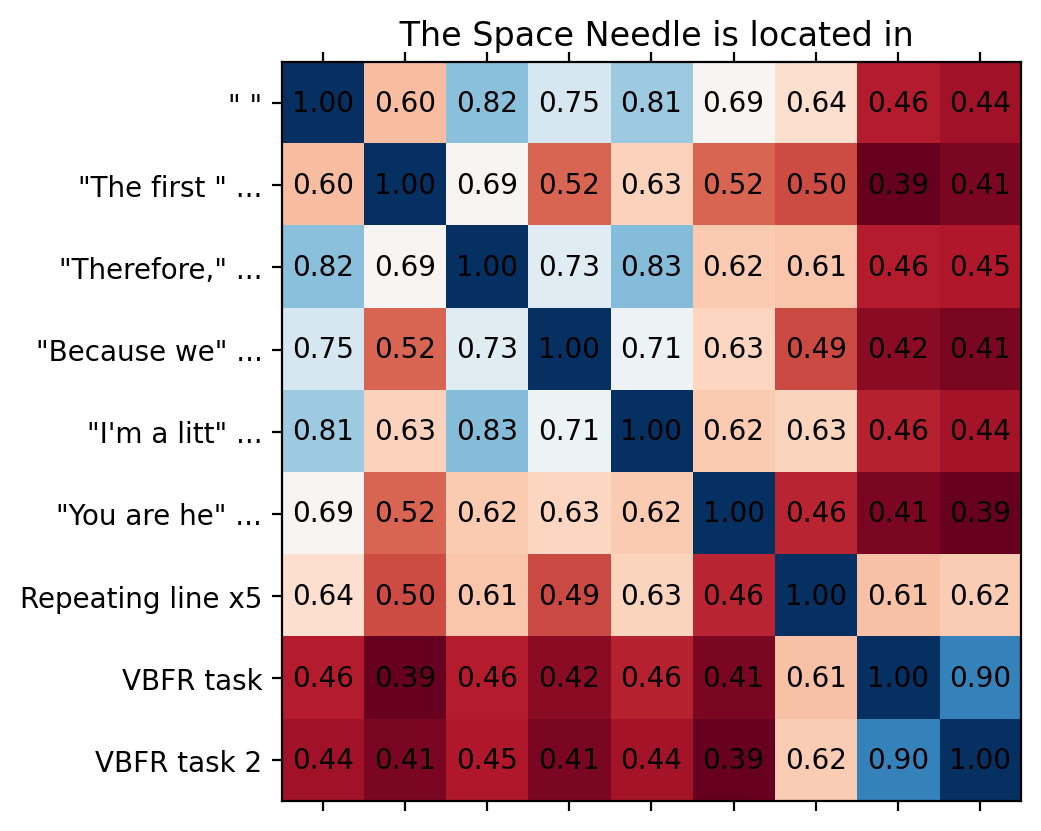

In [209]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
min_val, max_val = -1, 1

ytick_labels = ["\" \""] + [
    f"\"{context[:10]}\" ..." 
    if len(context) > 10 else f"\"{context[:10]}\""
    for context in context_templates[-1]
]
ytick_labels.append("Repeating line x5")
ytick_labels.append("VBFR task")
ytick_labels.append("VBFR task 2")


ax.matshow(color_matrix, cmap=plt.cm.RdBu)

for i in range(color_matrix.shape[0]):
    for j in range(color_matrix.shape[1]):
        c = color_matrix[j,i]
        ax.text(i, j, f"{c:.2f}", va='center', ha='center')

ax.set_title(query)
ax.set_yticks(
    ticks = np.arange(color_matrix.shape[0]),
    labels = ytick_labels
)
ax.set_xticks(
    ticks = np.arange(color_matrix.shape[0]),
    labels = ["" for _ in range(color_matrix.shape[0])]
)